<a href="https://colab.research.google.com/github/RishanaAbubacker/Classification_Model_For_Drug_Side_Effects/blob/main/Classification_Model_For_Drug_Side_Effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**I. Analytic Libraries**

**Importing the Libraries**

In [1]:
# Analysis tools
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

In [2]:
# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py

In [3]:
# Natural Language Processing Tools
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.util import ngrams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# **II. Dataset**

**1. Mounting Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Loading the Dataset**

Loading the datset into a dataframe

In [6]:
data=pd.read_csv("/content/drive/MyDrive/Drug_Reviews_WebMD.csv")

**3. Data Exploration**

Exploring the dataset and variables for better understanding

In [7]:
# First five rows
data.head()

Age  ... UsefulCount
0  75 or over  ...           0
1       25-34  ...           1
2       65-74  ...           0
3  75 or over  ...           0
4       35-44  ...           1

[5 rows x 12 columns]

In [8]:
# Last five rows
data.tail()

Age  ... UsefulCount
362801  55-64  ...           2
362802         ...          16
362803  25-34  ...           3
362804  55-64  ...           1
362805  45-54  ...           3

[5 rows x 12 columns]

In [9]:
# Columns
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [10]:
# Rows and columns
data.shape

(362806, 12)

In [11]:
# Datatypes
data.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [12]:
# More information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


Observation: Datatypes of 'Date' and 'Age' need to be processed

In [13]:
# Null value count
data.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

Observation: 'Reviews' contains missing data

In [14]:
# Unique value count
for i in data.columns:
    print(i,':',data[i].nunique(),'\n')

Age : 12 

Condition : 1806 

Date : 4524 

Drug : 7093 

DrugId : 6572 

EaseofUse : 7 

Effectiveness : 7 

Reviews : 250159 

Satisfaction : 7 

Sex : 3 

Sides : 1651 

UsefulCount : 148 



Observation: 'Sex' has 3 categories, 'Drug ID' has more values than 'Drug', 'Condition' has lesser values than 'Drug'/'Drug ID'.

In [15]:
# Value counts for each feature
for i in data.columns:
  print("----------------")
  print((data[i].value_counts()).to_frame(),'\n')
 

----------------
              Age
45-54       80043
55-64       75136
35-44       55011
25-34       49718
65-74       41216
19-24       24230
75 or over  15226
            12202
13-18        7045
07-Dec       1644
03-Jun        838
0-2           497 

----------------
                                                    Condition
Other                                                   49765
Pain                                                    25232
High Blood Pressure                                     23275
Depression                                              14509
Birth Control                                           12253
...                                                       ...
Bacteroides Bacteria Infection of Female Pelvic...          1
Infection of Female Pelvic Organs caused by Kle...          1
Metastatic Anal Cancer                                      1
Respiratory Syncytial Viral Infection of Respir...          1
Treatment to Prevent Hepatitis A                

Observation: Many attributes have unspecified data as whitespaces

Conclusion: Given an array of attributes, such as text and ratings related to the prescribed medicine to the patient.

# **III. Data Preprocessing**

1. Data wrangling
2. Data Transformation
3. Feature Reduction





**1. Data Wrangling**

Cleaning irrelevant data, missing data, data with inconsistent datatypes etc

**1.1. Handling Whitespaces**

In [16]:
# Handling instances with whitespaces
for i in data:
    data[i]=np.where(data[i]==" ",np.NAN,data[i])

**1.2. Handling Missing values**

In [17]:
# Null value count
data.isnull().sum()

Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41861
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

Null Value count: This bar plot shows the null value count of each feature.

Text(0.5, 1.0, 'Total Missing Value ')

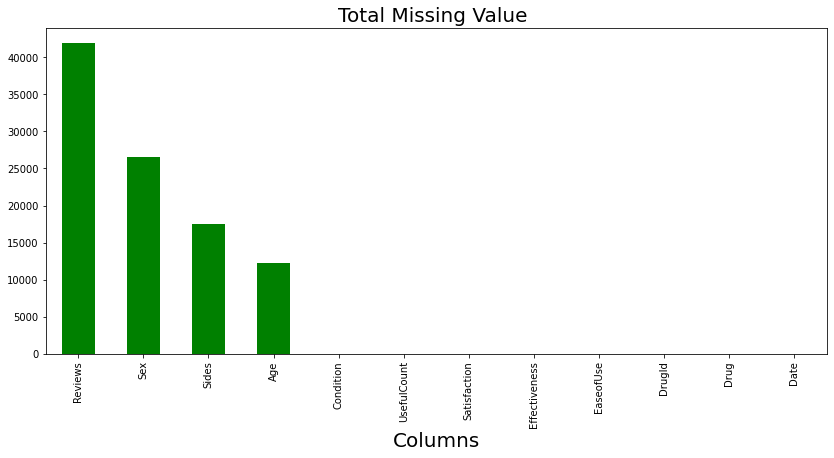

In [18]:
percent = (data.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='Green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

'Age', 'Sex', 'Sides', 'Reviews' have missing data

In [19]:
# Removing rows with null data
data=data.dropna(axis=0)

In [20]:
# Resetting index
data.reset_index(drop=True, inplace=True)

In [21]:
data.shape

(280127, 12)

**1.3. Date**

Converting 'Date' into date-time datatype

In [22]:
# Datetime format
data['Date']=pd.to_datetime(data['Date'], infer_datetime_format=True)

In [23]:
data.dtypes

Age                      object
Condition                object
Date             datetime64[ns]
Drug                     object
DrugId                  float64
EaseofUse               float64
Effectiveness           float64
Reviews                  object
Satisfaction            float64
Sex                      object
Sides                    object
UsefulCount             float64
dtype: object

**1.4. Age**

handling missing values, splitting into 2 features, converting into integer datatype

In [24]:
# cleaning 'Age' data
def age_clean(age):
  dataframe=age.str.replace("or over", "")
  dataframe=np.where(age=="07-Dec",np.NAN,dataframe)
  dataframe=np.where(age=="03-Jun",np.NAN,dataframe)
  return dataframe

In [25]:
data['Age'] = age_clean(data['Age'])

In [26]:
# Removing therows with null data
data=data.dropna(axis=0)

In [27]:
# Resetting the index
data.reset_index(drop=True, inplace=True)

In [28]:
data['Age'].value_counts()

45-54    64125
55-64    57469
35-44    45467
25-34    42799
65-74    29982
19-24    21233
75       10727
13-18     5975
0-2        393
Name: Age, dtype: int64

In [29]:
# splitting age group into 2 features and storing in another dataframe
age=data['Age'].str.split("-",n=1, expand=True)
age.rename(columns={0:'age_low_limit', 1:'age_up_limit'}, inplace=True)
age['age_up_limit']=age['age_up_limit'].fillna(94)

In [30]:
# converting into integer datattype
age['age_up_limit']=age['age_up_limit'].astype('int64')
age['age_low_limit']=age['age_low_limit'].astype('int64')

In [31]:
# Replacing zeroes from lower limit of age
age['age_low_limit']=np.where(age['age_low_limit']==0,1,age['age_low_limit'])

In [32]:
age.head()

age_low_limit  age_up_limit
0             75            94
1             25            34
2             25            34
3             45            54
4             55            64

In [33]:
data.drop(['Age'], inplace=True, axis=1)

In [34]:
data.shape

(278170, 11)

#**iV. Text Processing**

Analysing stopwords and defining a function for text cleaning

In [35]:
# converting rows having data other than string datatype into  string.
for i in range(0,len(data)-1):
    if type(data.iloc[i]['Sides']) != str:
        data.iloc[i]['Sides'] = str(data.iloc[i]['Sides'])

for i in range(0,len(data)-1):
    if type(data.iloc[i]['Reviews']) != str:
        data.iloc[i]['Reviews'] = str(data.iloc[i]['Reviews'])

In [36]:
# Removing html content from text data
# for sentence in data['Sides']:
#   data['Sides'][i] = BeautifulSoup(data['Sides'][i], 'html.parser').get_text()

# for sentence in data['Reviews']:
#   data['Reviews'][i] = BeautifulSoup(data['Reviews'][i], 'html.parser').get_text()

**1. Stopwords**

Word cloud of stopwords

In [37]:
# Stopwords
stops = set(stopwords.words('english'))

In [38]:
# Defining function for plotting wordcloud
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

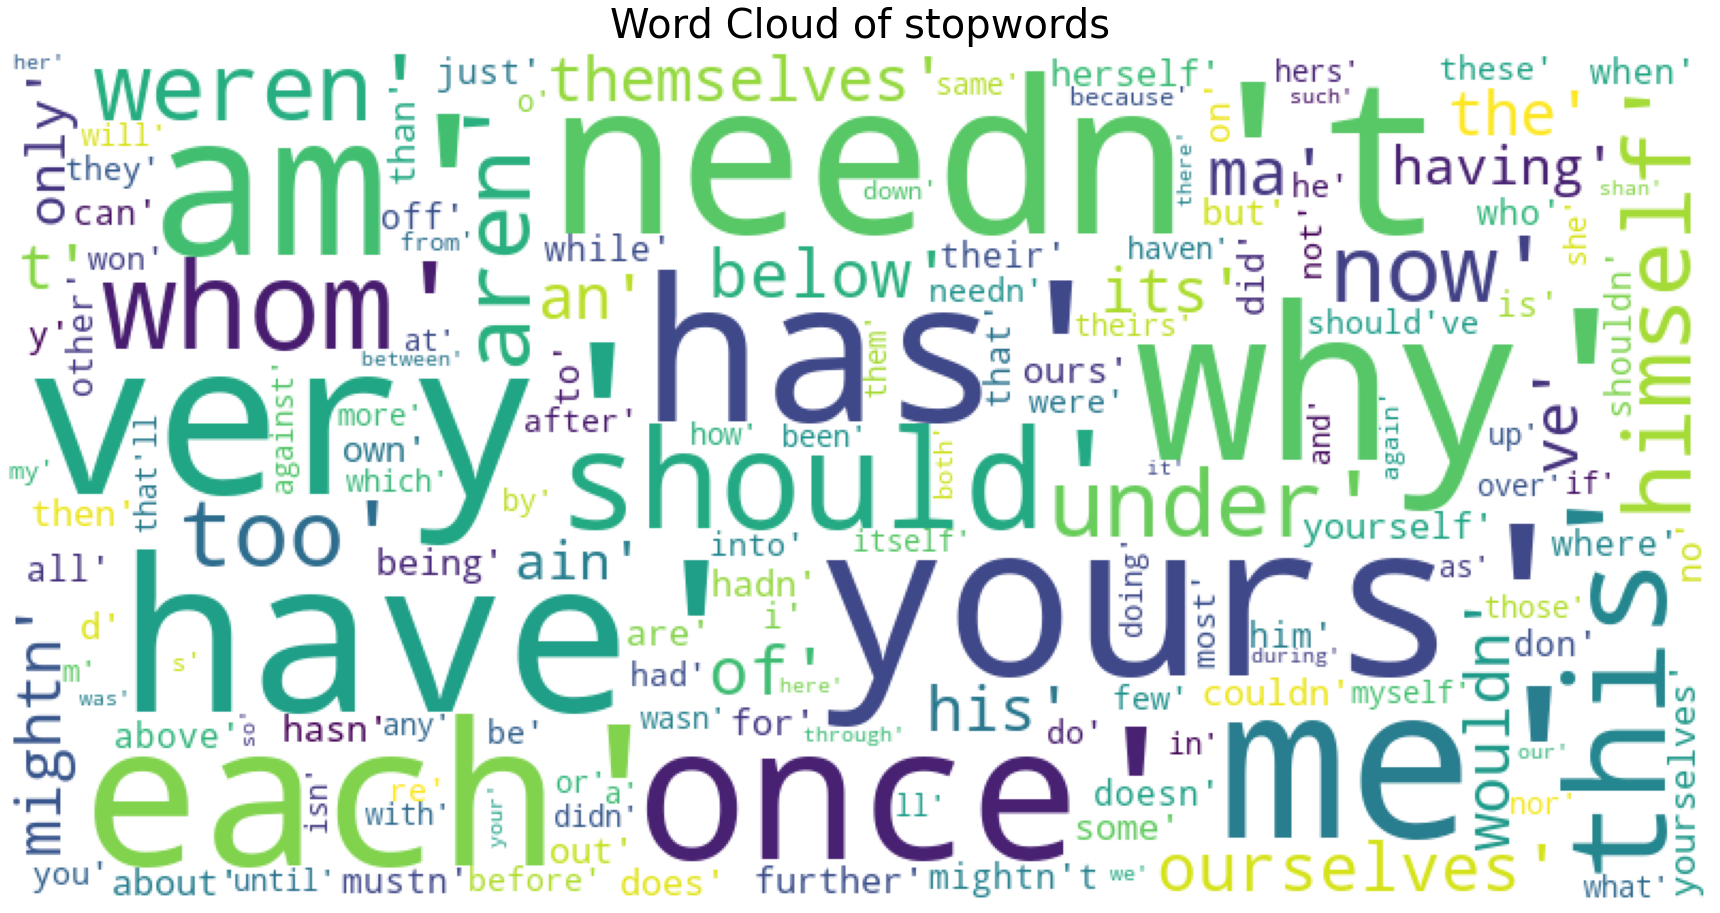

In [39]:
# Word cloud for stopwords
plot_wordcloud(stops, title="Word Cloud of stopwords")
plt.show()

Observation: There are many words that include not, like needn't. These words are key parts of emotional analysis, so we will remove them from stopwords.

In [40]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't", "wouldn't"]
for i in not_stop:
    stops.remove(i)

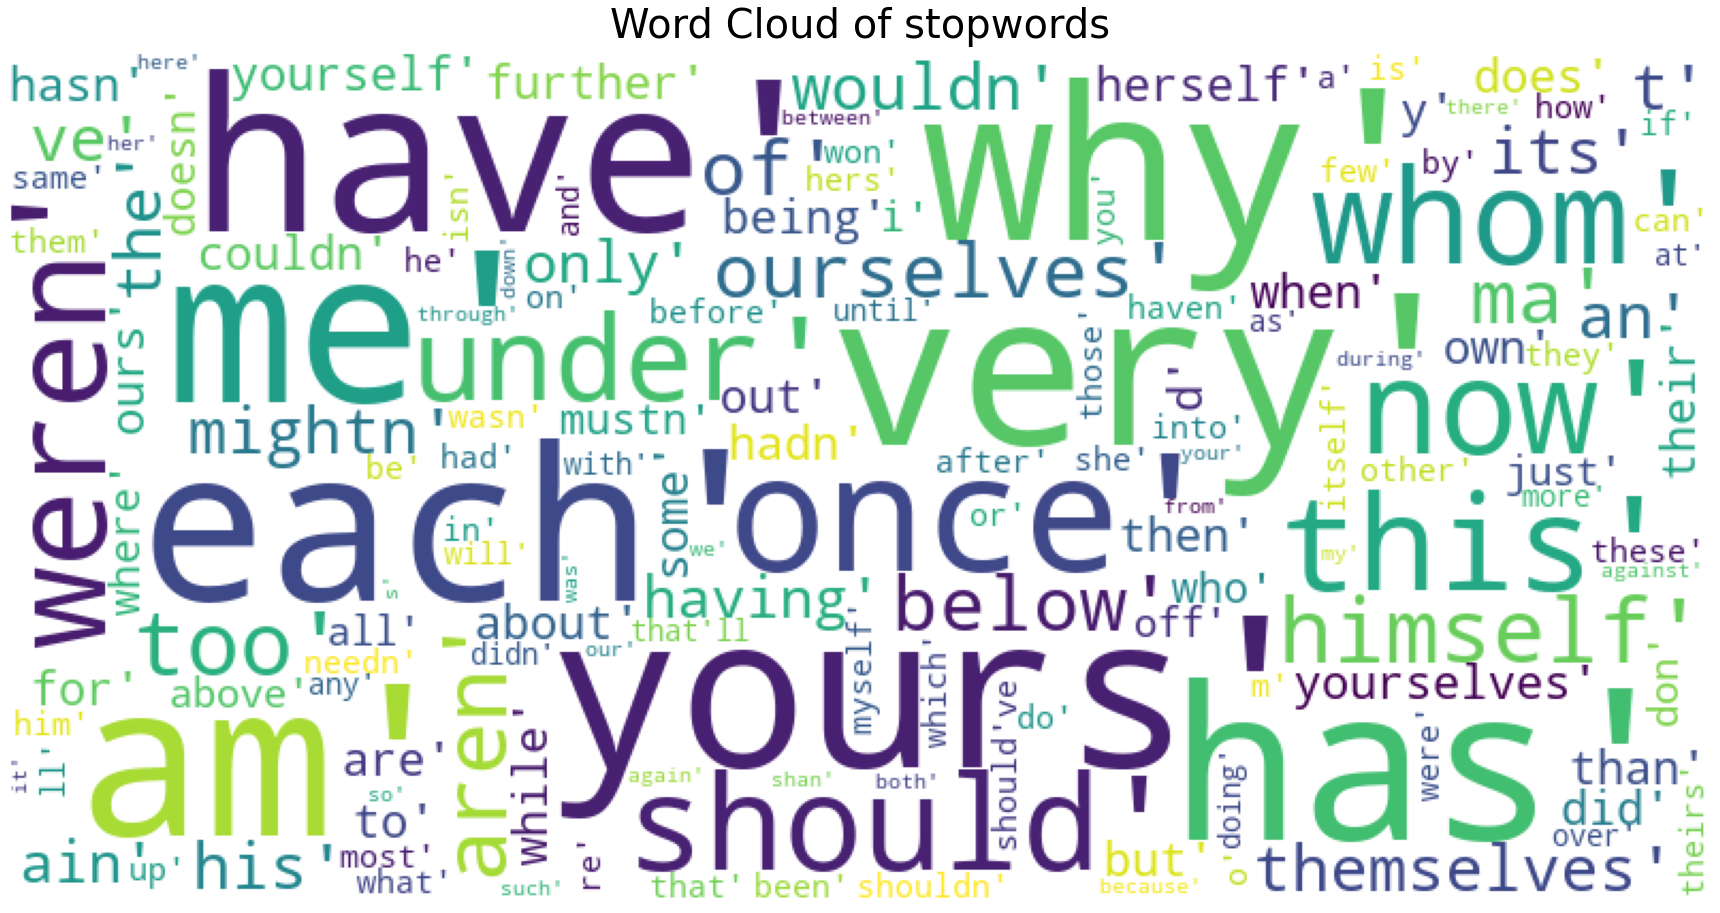

In [41]:
# Word cloud for modified stopwords
plot_wordcloud(stops, title="Word Cloud of stopwords")
plt.show()

In [42]:
# Defining function for cleaning text data
def clean_data(raw_data):
  # Case text as lowercase
  raw_data = raw_data.apply(lambda x: " ".join(x.lower() for x in x.split()))
  # Removing  stopwords
  raw_data = raw_data.apply(lambda x: " ".join(x for x in x.split() if x not in stops))
  # Replacing all special characters
  raw_data = raw_data.str.replace ('[^\w\d\s]','')
  # Replacing non ASCII characters with single space
  raw_data = raw_data.str.replace ('[^\x00-\x7F]+','')
  # Removing the leading and trailing Whitespaces
  raw_data = raw_data.str.replace ('^\s+|\s+?$','')
  # Replacing multiple Spaces with Single Space
  raw_data = raw_data.str.replace('\s+',' ')
  # Replacing Two or more dots with one
  raw_data = raw_data.str.replace ('\.{2,}','')
  # Cleaning data
  raw_data = raw_data.str.replace ('[^0-9A-Za-z \t]','')
  # Initiate nltk lemmatiser
  lemmatizer = WordNetLemmatizer()
  # Lemmatise words
  raw_data = raw_data.apply(lambda x: " ".join(lemmatizer.lemmatize(word) for word in x.split()))
  return raw_data

**2. Sides**

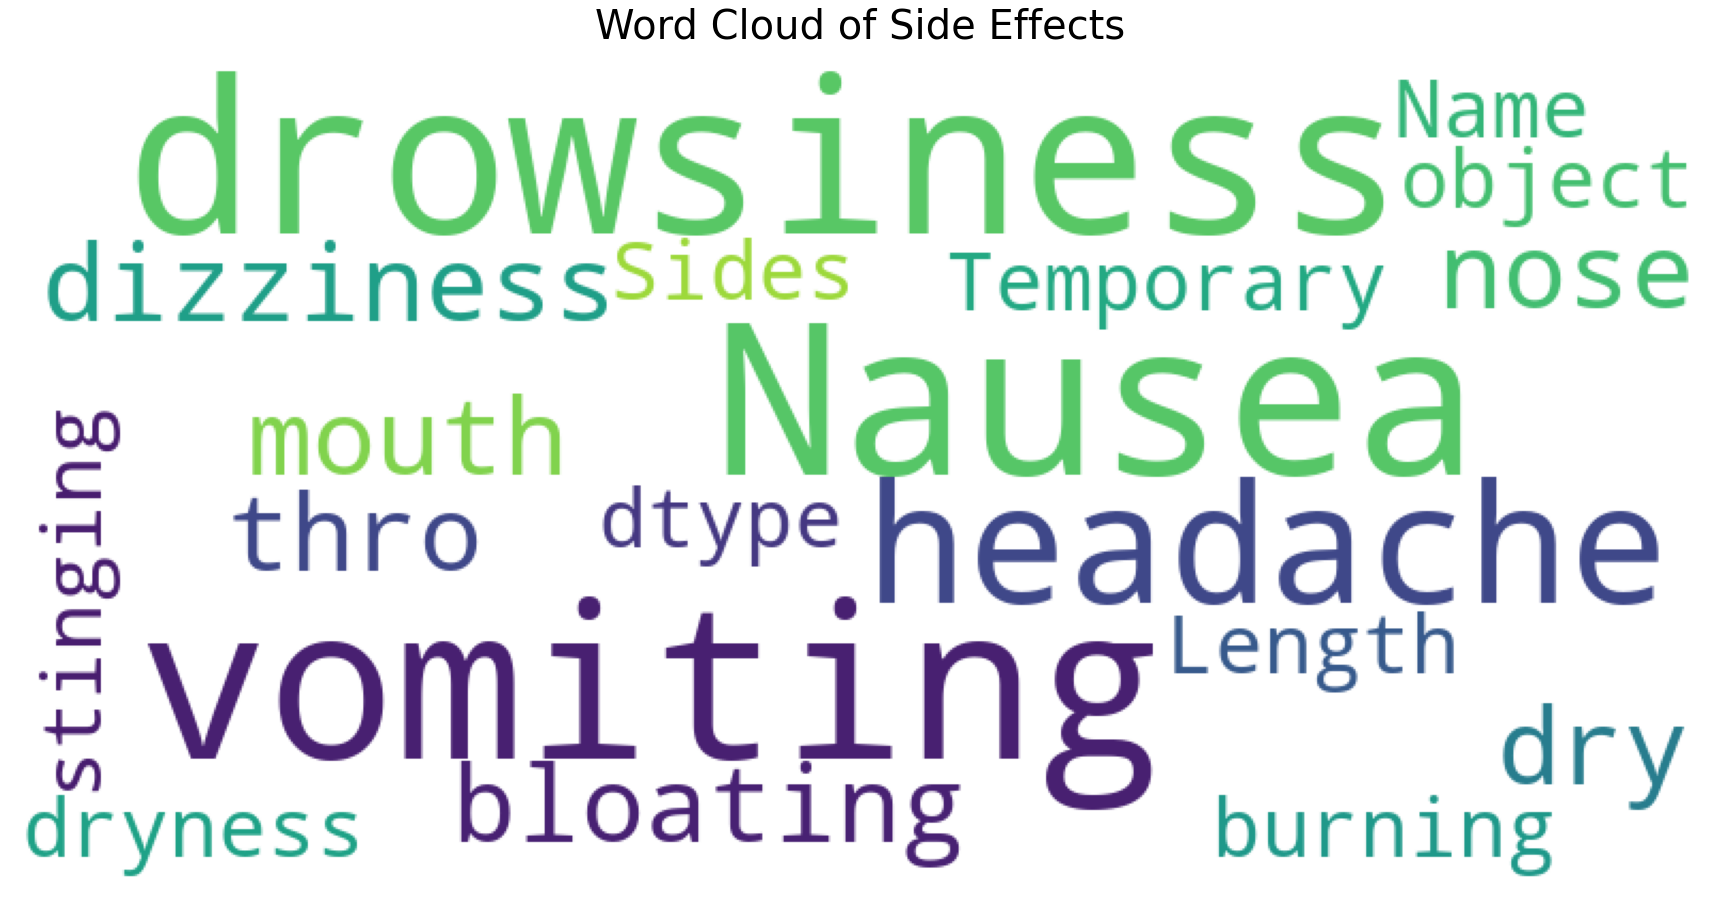

In [43]:
# Word cloud for Sides
plot_wordcloud(data["Sides"], title="Word Cloud of Side Effects")
plt.show()

In [44]:
# Cleaning sides
data['Sides']=clean_data(data['Sides'])

In [45]:
data.head()

Condition  ... UsefulCount
0                    Stuffy Nose  ...         0.0
1                  Cold Symptoms  ...         1.0
2                  Birth Control  ...         0.0
3  Disease of Ovaries with Cysts  ...         0.0
4                    Stuffy Nose  ...         0.0

[5 rows x 11 columns]

**3. Reviews**

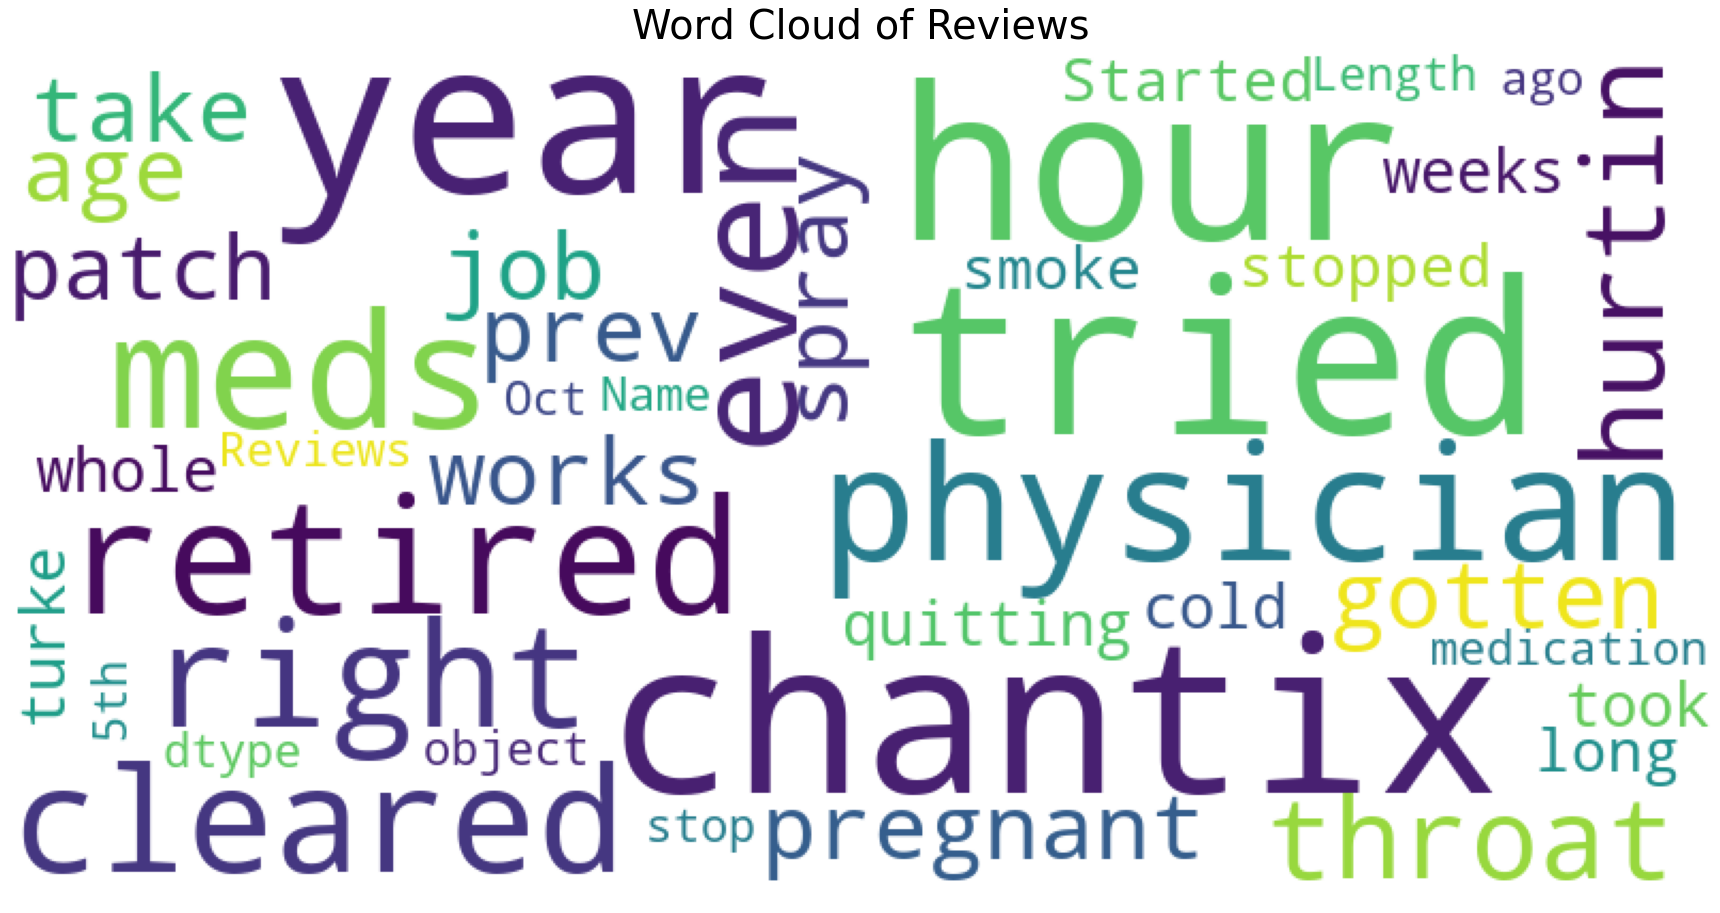

In [46]:
# Word cloud for Reviews
plot_wordcloud(data["Reviews"], title="Word Cloud of Reviews")

In [47]:
# cleaning reviews
data['Reviews']=clean_data(data['Reviews'])

In [48]:
data.head()

Condition  ... UsefulCount
0                    Stuffy Nose  ...         0.0
1                  Cold Symptoms  ...         1.0
2                  Birth Control  ...         0.0
3  Disease of Ovaries with Cysts  ...         0.0
4                    Stuffy Nose  ...         0.0

[5 rows x 11 columns]

# **V. Data Analysis**

Analysing the relationship between the features

**1. Drug-Drug ID**

In [49]:
# List of Drugs for each Drug ID
import itertools
drugs = {}
for drugid, drug in data[["DrugId", "Drug"]].itertuples(index=False):
    drugs.setdefault(drugid, set()).add(drug)
drugs = {k:list(v) for k,v in drugs.items()}

drugs_with_more_names = {k:list(v) for k,v in drugs.items() if len(v) > 1}
for k,v in dict(itertools.islice(drugs_with_more_names.items(), 10)).items():
    print(f"{k:10}: {list(v)[:2]}")

  167493.0: ['lynparza tablet', 'lynparza']
    7286.0: ['loteprednol etabonate ointment', 'loteprednol etabonate drops, gel']
    7319.0: ['lotemax drops, gel', 'lotemax ointment']
  164437.0: ['lorcaserin tablet, extended release 24 hr', 'lorcaserin tablet']
    8892.0: ['lorazepam concentrate', 'lorazepam']
   76548.0: ['loratadine d', 'loratadine-d']
      73.0: ['loratadine', 'loratadine tablet,disintegrating']
    8555.0: ['loprox suspension, topical', 'loprox cream']
    4789.0: ['loperamide liquid', 'loperamide']
    5887.0: ['lithium carbonate er', 'lithium carbonate']


Observation:It turns out the reason why drugs have more value than DrugId is that some drugs are sold in different forms, like cream, pill, gel.

**2. Drug ID-Sides**

In [50]:
# List of side effects for each Drug ID
import itertools
sides = {}
for drugid, side in data[["DrugId", "Sides"]].itertuples(index=False):
    sides.setdefault(drugid, set()).add(side)
sides = {k:list(v) for k,v in sides.items()}

sides_with_more_names = {k:list(v) for k,v in sides.items() if len(v) > 1}
for k,v in dict(itertools.islice(sides_with_more_names.items(), 10)).items():
    print(f"{k:10}: {list(v)[:2]}")

  167493.0: ['nausea vomiting loss appetite diarrhea headache dizziness change way food taste tiredness may occur', 'nausea vomiting loss appetite diarrhea constipation bad taste mouth dizziness joint back muscle pain may occur']
    7286.0: ['stingingburning eye 1 2 minute temporary blurred vision may occur apply medication effect persist worsen tell doctor pharmacist promptly', 'temporary blurred vision may occur apply medication feeling something eye may also occur']
    7319.0: ['temporary blurred vision may occur apply medication feeling something eye may also occur', 'temporary blurred vision may occur apply medication effect persists worsens tell doctor pharmacist promptly']
  159426.0: ['nausea vomiting stomach upset runnystuffy nose diarrhea may occur', 'nausea vomiting stomach upset diarrhea metallic taste mouth may occur']
    8532.0: ['temporary redness stinging little bit swelling may occur application site', 'redness swelling blister change skin color site application may

**3. Drug-Sides**

In [51]:
# Grouping Sides and Drug togethor
gb=data['Sides'].groupby(data['Drug']).nunique()

In [52]:
gb=pd.DataFrame(gb)
print(gb)

                                         Sides
Drug                                          
12 hour nasal relief spray, non-aerosol      1
20dm-4cpm                                    1
25dph-7.5peh                                 1
40pse-400gfn-20dm                            1
60pse-400gfn                                 1
...                                        ...
zytiga                                       1
zyvox                                        1
zyvox solution, intravenous                  1
zyvox suspension, reconstituted              1
zzzquil                                      1

[4998 rows x 1 columns]


In [53]:
gb.value_counts()

Sides
1        4996
2           2
dtype: int64

Observation: Side effects are specific to each drug with a few cases of exceptions.

Conclusion: Classifying drugs based on given side effects wouldn't be meaningful since each drug is having particular group of side effects for all age group and gender.

**4. Reviews**

**4.1. N-grams**

In [54]:
# defining function for n-grams
from collections import defaultdict
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# defining function for plotting n-grams as bar chart  
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace



In [55]:
# Unigram
freq_dict = defaultdict(int)
for sent in data["Reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words-unigram"])
fig.append_trace(trace0, 1, 1)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Observation: Emotions are not classified well when we analyze text with a single corpus.


In [56]:
# Bigram
freq_dict = defaultdict(int)
for sent in data["Reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words bigram"])
fig.append_trace(trace0, 1, 1)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Observation: Emotions are classified better when we analyze text with bigrams compared with unigrams.

In [57]:
# Trigram
freq_dict = defaultdict(int)
for sent in data["Reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words-trigram"])
fig.append_trace(trace0, 1, 1)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Observation: Sentiments are classified better when we analyze text with trigrams compared with unigrams and bigrams. Also we can see that most of the words are related to side effects.

In [58]:
# 4-gram
freq_dict = defaultdict(int)
for sent in data["Reviews"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words-4gram"])
fig.append_trace(trace0, 1, 1)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Observation: 4-gram of reviews shows that emotions are classified mainly on side effects.

**4.2. Bag of Model for Reviews**

In [59]:
# Creating the Bag of Words model
word2count = {} 
for sentence in data['Reviews']: 
    words = nltk.word_tokenize(sentence) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

In [60]:
word2count

{'im': 46348,
 'retired': 292,
 'physician': 1990,
 'med': 40388,
 'tried': 15771,
 'allergy': 3252,
 'seasonal': 351,
 'not': 137025,
 'one': 41100,
 'effective': 12198,
 'me': 31612,
 'first': 38411,
 'began': 7508,
 'using': 16136,
 'drug': 75434,
 'year': 71811,
 'ago': 18046,
 'tiredness': 1710,
 'problem': 31468,
 'currently': 2621,
 'cleared': 2638,
 'right': 12602,
 'even': 22429,
 'throat': 5135,
 'hurting': 1074,
 'went': 21368,
 'away': 15110,
 'taking': 94481,
 'medicine': 23133,
 'havent': 7344,
 'gotten': 3029,
 'pregnant': 3609,
 'job': 4126,
 'switched': 6655,
 'brand': 3557,
 'another': 11197,
 'generic': 8180,
 'get': 53063,
 'nauseous': 2079,
 'generally': 952,
 'feel': 46020,
 'tired': 11444,
 'this': 9393,
 'also': 40360,
 'headache': 20687,
 'take': 84070,
 '5': 17400,
 'age': 3086,
 '4550': 6,
 'prevent': 1798,
 'ovarian': 464,
 'cyst': 1106,
 'i': 4434,
 '2': 39470,
 'burst': 321,
 'stopped': 15452,
 'no': 64436,
 'side': 73985,
 'effect': 73902,
 '12': 9760,
 '

Observation: In Reviews most of the words are related to side effects and their nature.

**4.3. TF-IDF Vectorization**

In [61]:
# Calculating tf-idf values
from sklearn.feature_extraction.text import TfidfVectorizer
   
tfidf = TfidfVectorizer(ngram_range = (4, 4), stop_words=stops)
features = tfidf.fit_transform(data['Reviews'])
  

In [62]:
tfidf.get_feature_names()

['00 amazing didnt diet',
 '00 believe god help',
 '00 gelatin capsule capsule',
 '00 morning day unheard',
 '00 pain made feel',
 '000 cd4 come slightly',
 '000 people suffering joint',
 '000 since first checkup',
 '000 still bronchospasm severe',
 '000 undetectableyahoo scattered headache',
 '000 wouldnt buy medication',
 '00001 group slipping thru',
 '0001 get pregnant nuva',
 '0005 sol bedtime lowered',
 '000l blood bone marrow',
 '001 able get bottle',
 '001 approved generic substitute',
 '001 available not sure',
 '001 bp still 14099',
 '001 currently 060 seed',
 '001 every night december',
 '001 generic ear canal',
 '001 gm 1109 14',
 '001 later uncomfortable sick',
 '001 listing insurer formulary',
 '001 ml giving even',
 '001 oz bottle come',
 '001 participant also 1996',
 '001 people medication get',
 '001 ten minute fluorouracil',
 '0015 gel applied day',
 '0015 gel spot first',
 '00173 stronger combo available',
 '001but doctor cant get',
 '002 people experience severe',
 '

In [63]:
tfidf.vocabulary_

{'im retired physician med': 2605312,
 'retired physician med tried': 4425587,
 'physician med tried allergy': 4038968,
 'med tried allergy seasonal': 3205608,
 'tried allergy seasonal not': 5512244,
 'allergy seasonal not one': 287208,
 'seasonal not one effective': 4520261,
 'not one effective first': 3705638,
 'one effective first began': 3815429,
 'effective first began using': 1646574,
 'first began using drug': 1987048,
 'began using drug year': 609247,
 'using drug year ago': 5654526,
 'drug year ago tiredness': 1544366,
 'year ago tiredness problem': 6049096,
 'ago tiredness problem not': 271412,
 'tiredness problem not currently': 5424266,
 'cleared right even throat': 908983,
 'right even throat hurting': 4443661,
 'even throat hurting went': 1738519,
 'throat hurting went away': 5353434,
 'hurting went away taking': 2557721,
 'went away taking medicine': 5853113,
 'havent gotten pregnant job': 2365090,
 'gotten pregnant job switched': 2282425,
 'pregnant job switched brand':

Observation: Reviews are mainly on the side effects of drugs

Conclusion: Since reviews mainly feature side effects of each drug, by analysing the sentiment score and polarity of reviews a new feature related to side effects can be created while mapping sentiment score into various categories based on the nature of side effects.

**5. Sentiment Analysis**

In [64]:
# Sentiment analysis using Textblob module give the sentiment polarity of the review.
def sentiment_polarity(text):
    review_sentiment=TextBlob(text).sentiment.polarity
    return review_sentiment 

In [65]:
# Feature engineering
data['sentiment_score'] = data['Reviews'].apply(sentiment_polarity)

**6. Feature Engineering**

**A. Side Effects**

In [66]:
# Mapping data into categories based on sentiments
data1=np.where(data['sentiment_score']==1, "No side effects", data['sentiment_score'])
data1=np.where(data['sentiment_score']<1, "Mild", data1)
data1=np.where(data['sentiment_score']<=0.2, "Moderate", data1)
data1=np.where(data['sentiment_score']<= -0.2, "Severe", data1)
data1=np.where(data['sentiment_score']== -1, "Extremely Severe", data1)

In [67]:
# Feature engineering
data['side effects']=data1

**B. Reviews**

In [68]:
# Word count in each review
data['count_word']=data["Reviews"].apply(lambda x: len(str(x).split()))

# Unique word count 
data['count_unique_word']=data["Reviews"].apply(lambda x: len(set(str(x).split())))

# Letter count
data['count_letters']=data["Reviews"].apply(lambda x: len(str(x)))

# Average length of the words
data["mean_word_len"] = data["Reviews"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.



**C. Age**

In [69]:
# Feature engineering: creating new feature by calculating mean of age group
age['age_mean']=age[['age_low_limit', 'age_up_limit']].mean(axis=1)

In [70]:
# Concatinating age dataframe with the drug dataset
data=pd.concat([age,data], axis=1)

In [71]:
# First 8 rows
data.head(8)

age_low_limit  age_up_limit  ...  count_letters mean_word_len
0             75            94  ...            132      5.333333
1             25            34  ...             59      5.666667
2             25            34  ...            110      5.937500
3             45            54  ...             78      3.937500
4             55            64  ...             25      3.333333
5             19            24  ...            176      5.555556
6             25            34  ...            341      5.576923
7             25            34  ...            213      5.114286

[8 rows x 20 columns]

In [72]:
# Last 8 rows of dataframe
data.tail(8)

age_low_limit  age_up_limit  ...  count_letters mean_word_len
278162             55            64  ...            234      5.351351
278163             25            34  ...            124      4.952381
278164             25            34  ...            180      5.961538
278165             25            34  ...            483      5.285714
278166             55            64  ...            195      4.939394
278167             25            34  ...            143      5.857143
278168             55            64  ...            193      4.878788
278169             45            54  ...            170      4.700000

[8 rows x 20 columns]

In [73]:
data['mean_word_len'].isnull().sum()

54

In [74]:
data['mean_word_len']=data['mean_word_len'].fillna(data['mean_word_len'].mean())

In [75]:
data['mean_word_len'].isnull().sum()

0

**7. Descriptive Statistics**

Statistical summary of numerical data

In [76]:
data.describe()

age_low_limit   age_up_limit  ...  count_letters  mean_word_len
count  278170.000000  278170.000000  ...  278170.000000  278170.000000
mean       42.932703      51.915785  ...     212.381687       5.456847
std        15.761515      17.302453  ...     201.945890       3.181615
min         1.000000       2.000000  ...       0.000000       1.000000
25%        25.000000      34.000000  ...      75.000000       4.952381
50%        45.000000      54.000000  ...     154.000000       5.363636
75%        55.000000      64.000000  ...     278.000000       5.829787
max        75.000000      94.000000  ...    2282.000000    1511.000000

[8 rows x 13 columns]

**8. Data Visualizations**

**A. Null Values Count**

This bar plot shows the null value count of each feature.

Text(0.5, 1.0, 'Total Missing Value ')

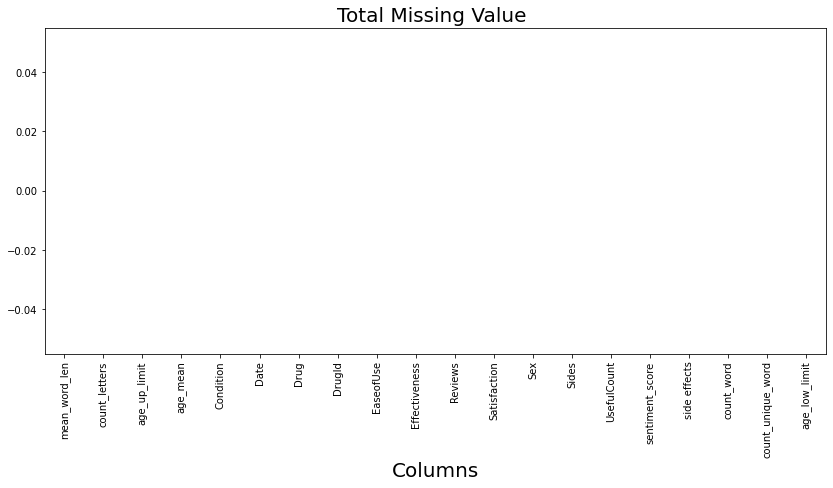

In [77]:
percent = (data.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

Observation: No more null values in the dataset

**B. Drug Vs Conditions**

This barplot shows the top 20 drugs with the number of conditions

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

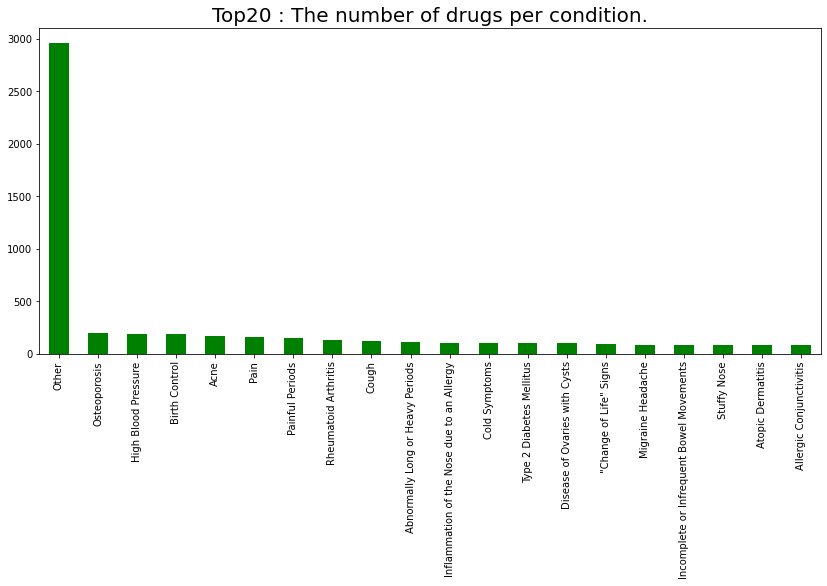

In [78]:
condition_data = data.groupby(['Condition'])['Drug'].nunique().sort_values(ascending=False)
condition_data[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

Observation: Drug is closely related to condition. There are less drugs per condition.

**C. Sex**

Bar plot of distribution of gender

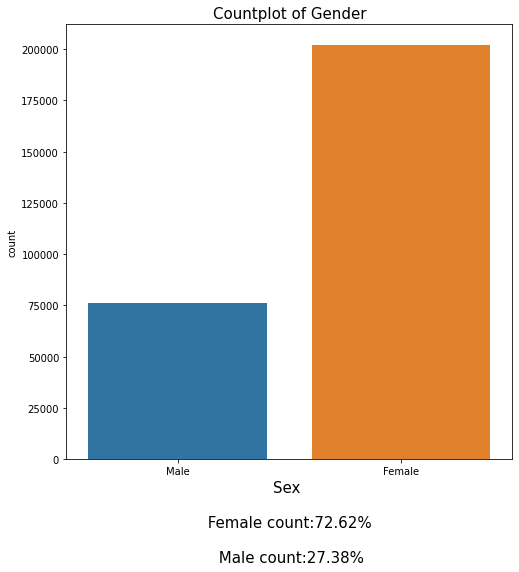

In [79]:
plt.figure(figsize = (8,8))
s=sns.countplot(x='Sex', data=data)
plt.title('Countplot of Gender', fontsize=15)
plt.xlabel('Sex \n \n Female count:{0:0.2f}% \n \n Male count:{1:0.2f}%'.format(data['Sex'].value_counts(normalize=True)[0]*100, data['Sex'].value_counts(normalize=True)[1]*100), fontsize=15)
plt.ylabel('count') 
plt.show()

Observation: Female percentage is 72.62. Only 27.38 is male percentage

**D. Word cloud of Sides after text processing**

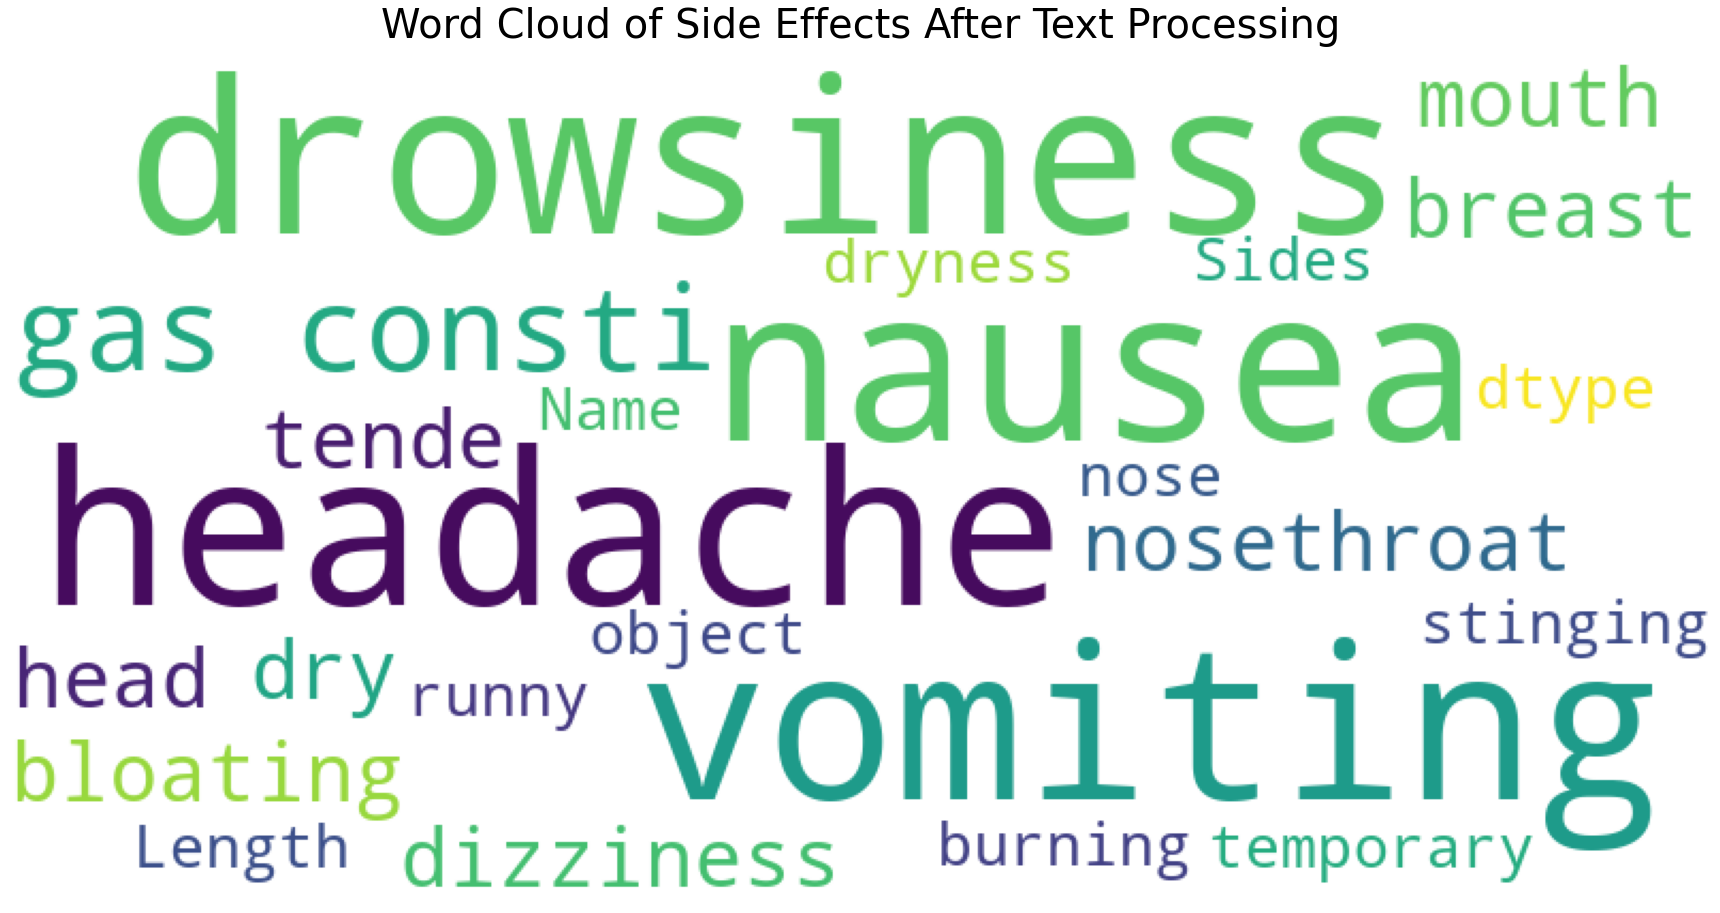

In [80]:
plot_wordcloud(data["Sides"], title="Word Cloud of Side Effects After Text Processing")
plt.show()

**E. Wordcloud of Reviews after text processing**

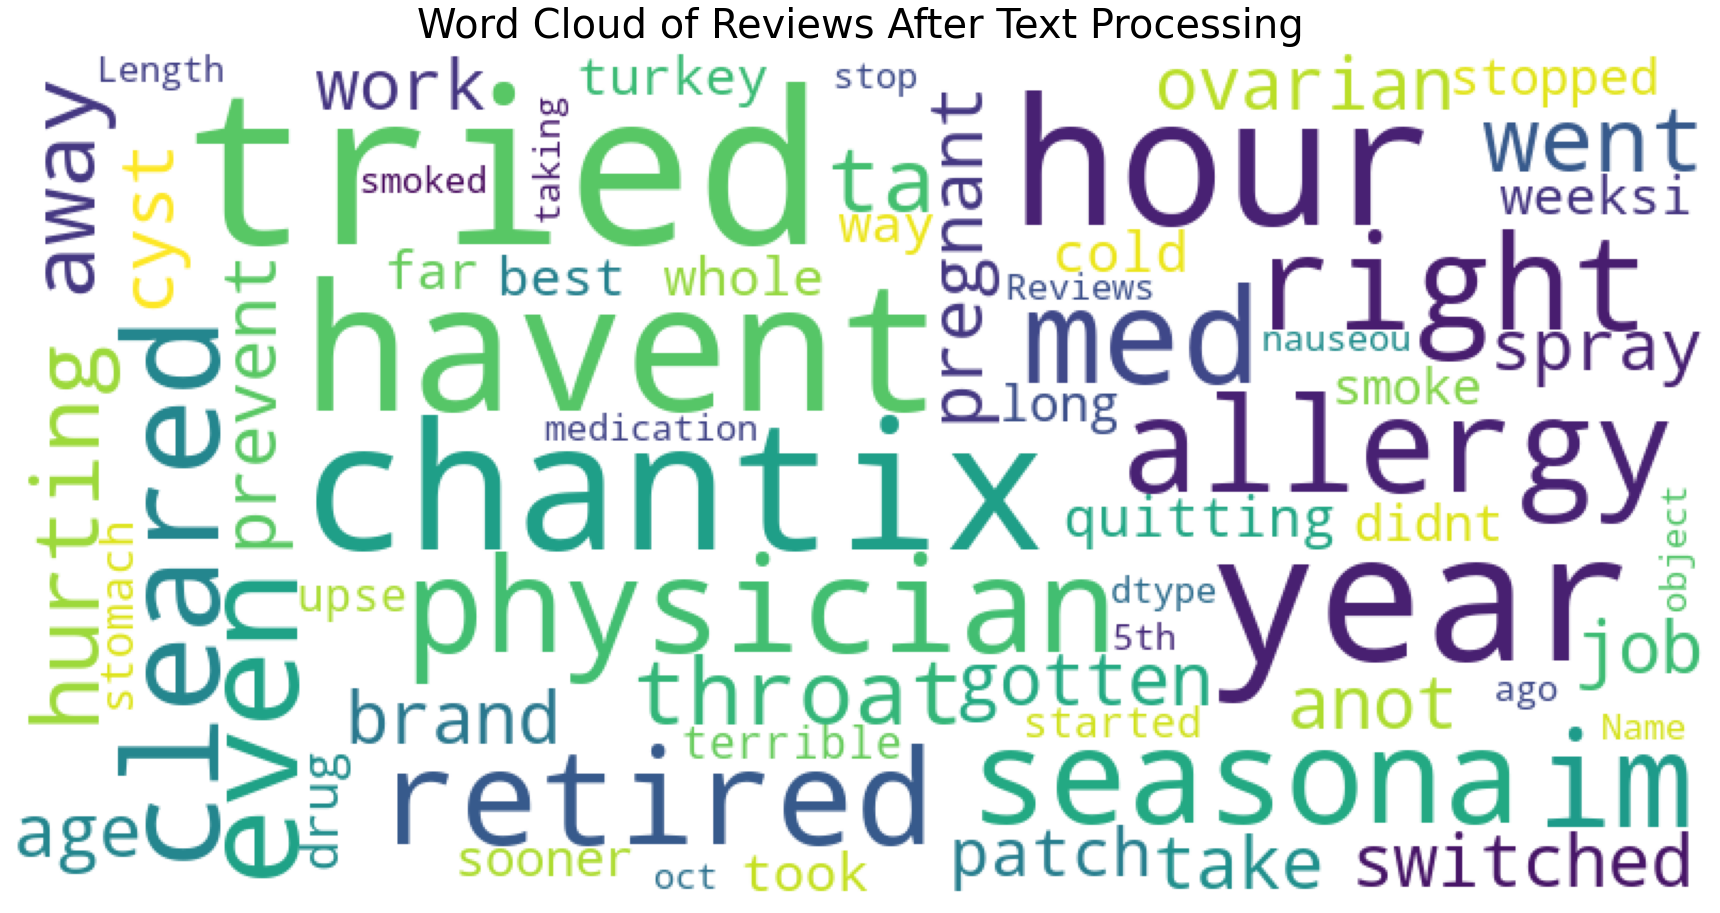

In [81]:
plot_wordcloud(data["Reviews"], title="Word Cloud of Reviews After Text Processing")

**F. Side Effects**

This pie chart shows the percentage distribution of side effects

In [82]:
data['side effects'].value_counts()

Moderate            187445
Mild                 54665
Severe               33900
Extremely Severe      1259
No side effects        901
Name: side effects, dtype: int64

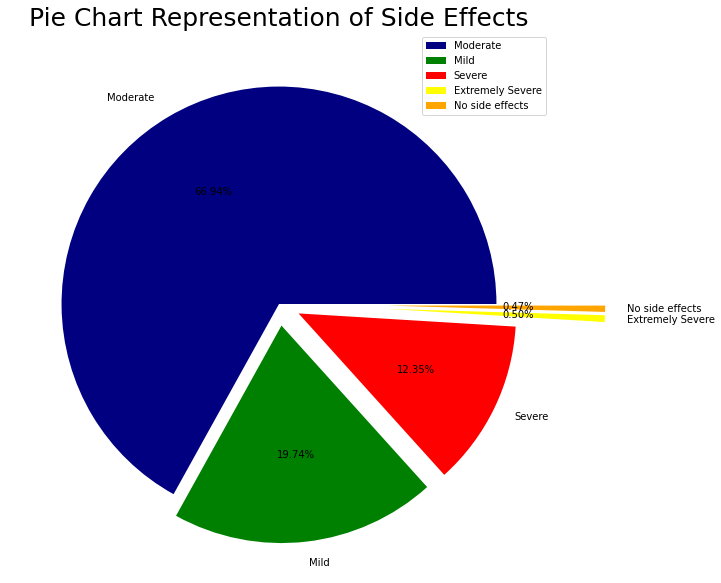

In [83]:
# Pie plot
size = [186216, 54913, 34354, 1393, 1294]
colors = ['navy', 'green', 'red', 'yellow', 'orange']
labels = "Moderate ","Mild", "Severe", "Extremely Severe", "No side effects"
explode = [0, 0.1, 0.1, 0.5, 0.5]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Side Effects', fontsize = 25)
plt.legend()
plt.show()

Observation: Most of the drugs have side effects and are mostly moderate in nature. Very few are having no side effects as well as extremely severe side effects.

**G. Distribution of Useful Count**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



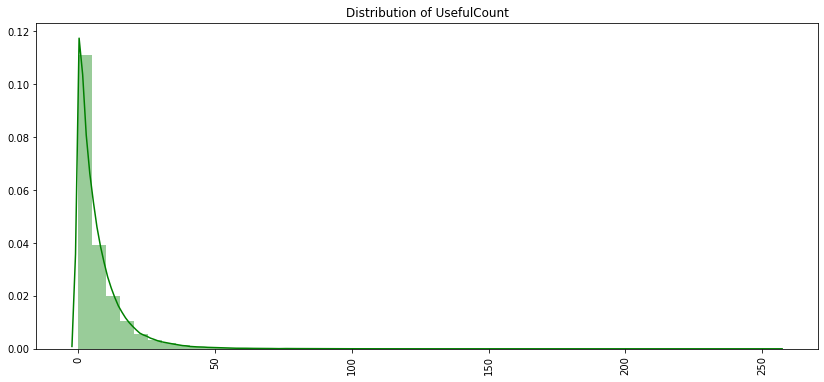

In [84]:
# Dist plot
plt.figure(figsize=(14,6))
sns.distplot(data["UsefulCount"],color="green")
plt.xticks(rotation='vertical')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Distribution of UsefulCount")
plt.show()

Observation: Certain drugs have high useful count

**H. Distribution of Sentiment Score**

Text(0, 0.5, 'Count')

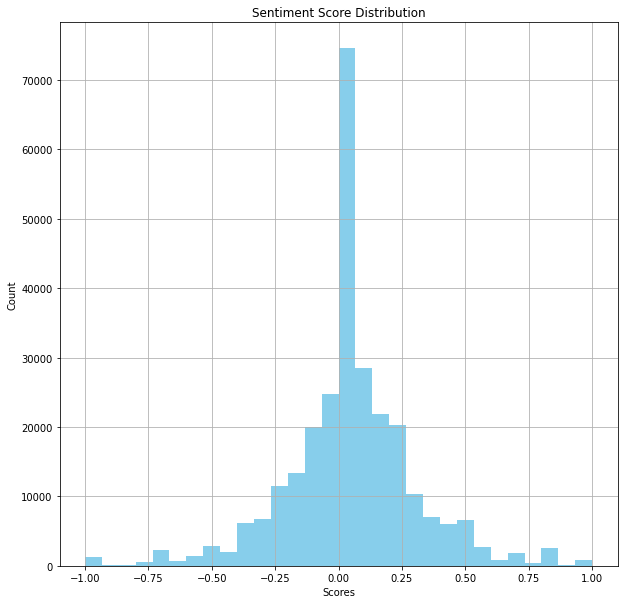

In [85]:
# Histogram
data.sentiment_score.hist(color='skyblue', bins=30)
plt.title('Sentiment Score Distribution')
plt.xlabel('Scores')
plt.ylabel('Count')

Observation: Sentiment score has a normal distribution.

**I. Distribution of features created from Review**

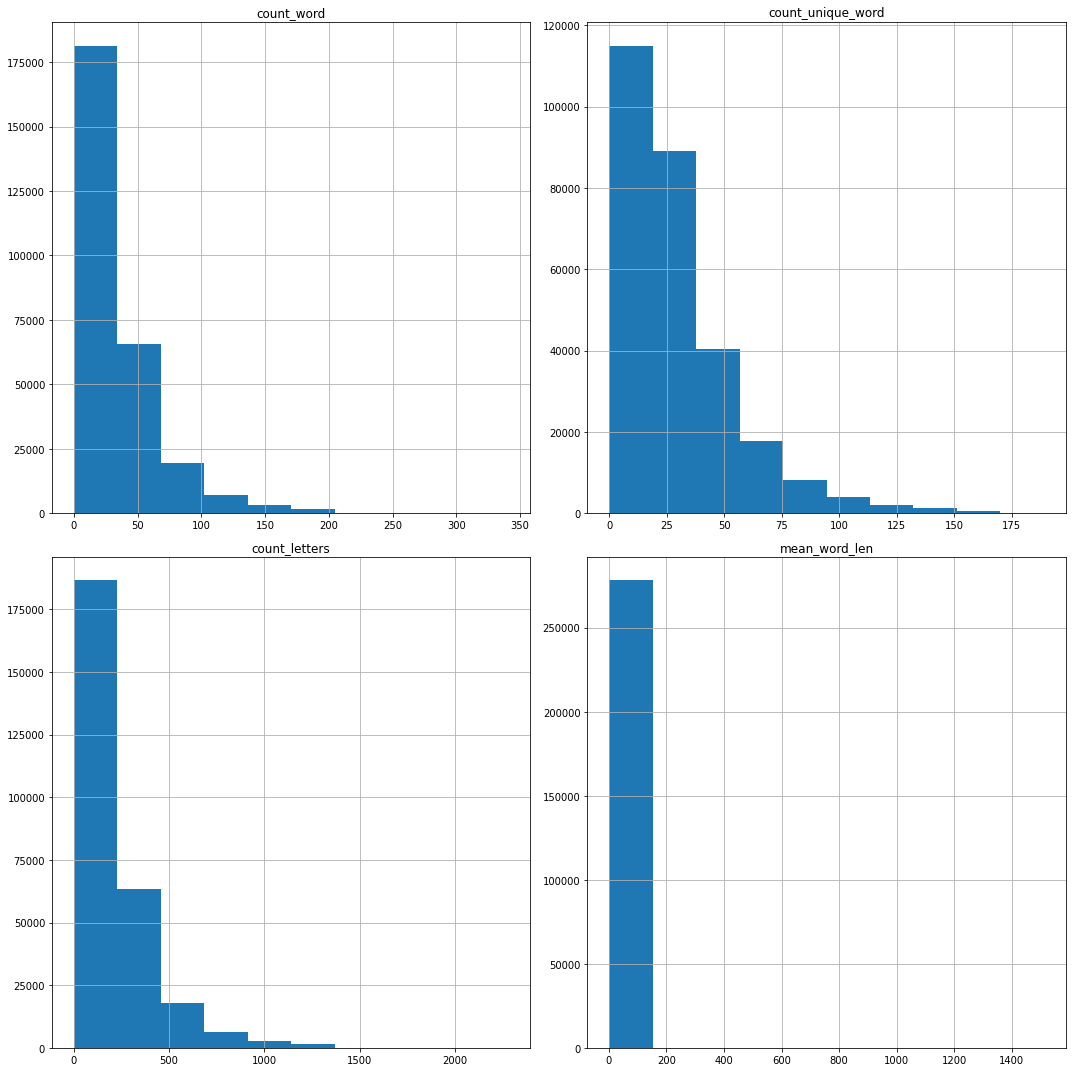

In [86]:
# Histogram
freqgraph=data[['count_word', 'count_unique_word', 'count_letters',
       'mean_word_len']]
freqgraph.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

Observation: Right skewed distribution

**I. Distribution of features created from Age**

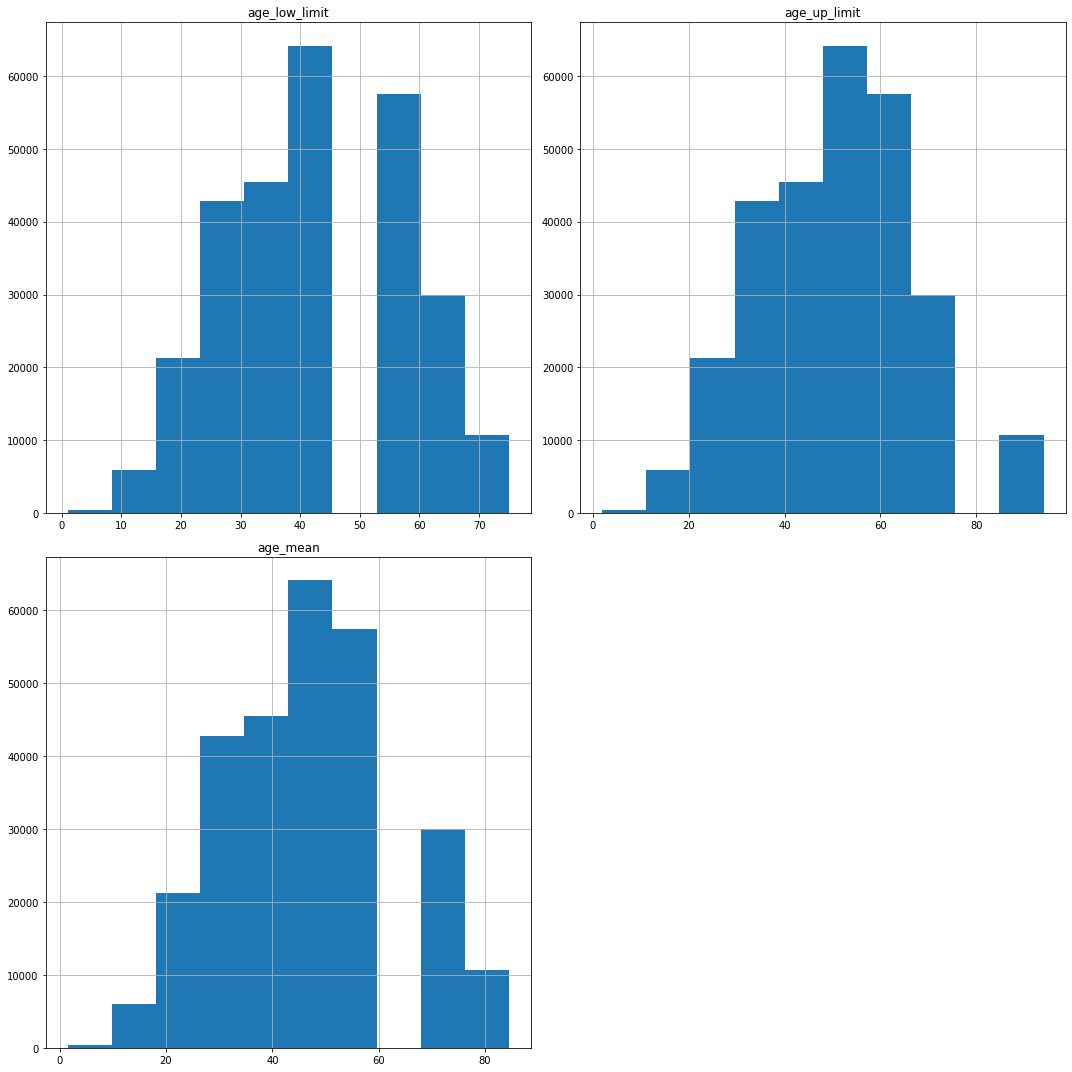

In [87]:
# Histogram
freqgraph=data[['age_low_limit', 'age_up_limit', 'age_mean']]
freqgraph.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

Observation: Left skewed distribution

**9. Data Preprocessing: 2. Data Transformation**

In [88]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
col=['side effects', 'Drug']
for feature in col:
  data[feature]=encoder.fit_transform(data[feature])


In [89]:
# One hot encoding
data['Sex']=pd.get_dummies(data['Sex'])

**10. Correlation Analysis**

This heatmap shows the linear relationship between the features

In [90]:
# Correlation Matrix
corr_matrix=data.corr()

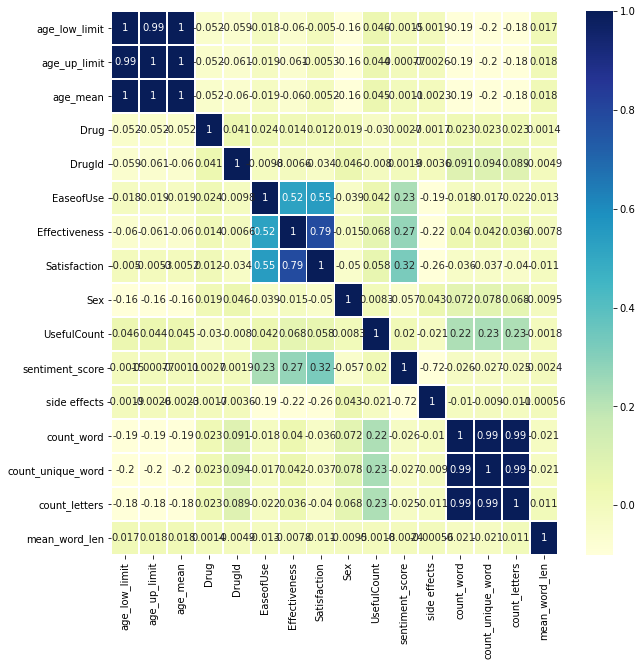

In [91]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmin=-0.1, vmax=1, annot=True, linewidths=0.7, cmap='YlGnBu')

#**VI. Model Development and Performance Evaluation**

**A. Dataset Splitting**

Splitting the dataset into train set and test set in the ratio of 75:25 respectively

In [92]:
data.columns

Index(['age_low_limit', 'age_up_limit', 'age_mean', 'Condition', 'Date',
       'Drug', 'DrugId', 'EaseofUse', 'Effectiveness', 'Reviews',
       'Satisfaction', 'Sex', 'Sides', 'UsefulCount', 'sentiment_score',
       'side effects', 'count_word', 'count_unique_word', 'count_letters',
       'mean_word_len'],
      dtype='object')

In [93]:
data.dtypes

age_low_limit                 int64
age_up_limit                  int64
age_mean                    float64
Condition                    object
Date                 datetime64[ns]
Drug                          int64
DrugId                      float64
EaseofUse                   float64
Effectiveness               float64
Reviews                      object
Satisfaction                float64
Sex                           uint8
Sides                        object
UsefulCount                 float64
sentiment_score             float64
side effects                  int64
count_word                    int64
count_unique_word             int64
count_letters                 int64
mean_word_len               float64
dtype: object

In [94]:
# Features for Model development
X=data.drop(['Reviews', 'Date', 'side effects', 'DrugId', 'Sides', 'Condition', 'Effectiveness', 'sentiment_score', 'age_mean', 'age_low_limit', 'count_word'], axis=1)
y=pd.DataFrame(data['side effects'])

In [95]:
# Splitting the Datset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.25)

**B. Machine Learning Algorithms**

Fitting the training set into machine learing models to predict the nature of side effcets, according to various features and evaluating the performance of models.

In [96]:
# Importing evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

**1. Logistic Regression**

In [97]:
# Fitting the training data and making the predictions on test data
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(multi_class='multinomial', solver='lbfgs')
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [98]:
#Performance Evaluation:
print("Accuracy is", accuracy_score(y_test,y_pred))
print("precision is", precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall is", recall_score(y_test,y_pred,  pos_label='positive', average='micro'))
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))
print("confusion matrix \n", confusion_matrix(y_test,y_pred))

Accuracy is 0.6750068303064292
precision is 0.6750068303064292
Recall is 0.6750068303064292
f1 score is 0.6750068303064292
confusion matrix 
 [[    0     0   290     0     0]
 [    0     2 13600     0     0]
 [    0     2 46940     0     0]
 [    0     0   223     0     0]
 [    0     0  8486     0     0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



**2. Decision Tree Algorithm**

In [99]:
# Fitting the training data and making the predictions on test data
from sklearn.tree import  DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)

In [100]:
# Performance Evaluation:
print("Accuracy is", accuracy_score(y_test,y_pred))
print("precision is", precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall is", recall_score(y_test,y_pred,  pos_label='positive', average='micro'))
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6740577772025941
precision is 0.6740577772025941
Recall is 0.6740577772025941
f1 score is 0.6740577772025941


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



array([[   77,    36,   132,     1,    44],
       [   44,  6759,  5738,    39,  1022],
       [  157,  6330, 36183,    87,  4185],
       [    1,    42,    91,    72,    17],
       [   63,   976,  3648,    14,  3785]])

**3. Random Forest Algorithm**

In [101]:
# Fitting the training data and making the predictions on test data
from sklearn.ensemble import RandomForestClassifier
Random_forest=RandomForestClassifier()
Random_forest.fit(X_train,y_train)
y_pred = Random_forest.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [102]:
# Performance Evaluation:
print("Accuracy is", accuracy_score(y_test,y_pred))
print("precision is", precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall is", recall_score(y_test,y_pred,  pos_label='positive', average='micro'))
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is 0.7659289935723221
precision is 0.7659289935723221
Recall is 0.7659289935723221
f1 score is 0.7659289935723221


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



array([[   77,     8,   189,     0,    16],
       [    1,  5451,  8047,     3,   100],
       [    5,  1707, 44757,     9,   464],
       [    0,    36,   114,    71,     2],
       [    1,   207,  5367,     2,  2909]])

In [103]:
# Importatnt features for Random Forest Model
important_features=pd.Series(Random_forest.feature_importances_, index=X.columns).sort_values(ascending=False)*100

In [104]:
important_features

Drug                 21.395014
mean_word_len        18.888932
count_letters        18.610659
UsefulCount          13.473640
count_unique_word    11.832275
age_up_limit          6.959573
Satisfaction          3.637736
EaseofUse             3.276510
Sex                   1.925660
dtype: float64

**4. Gradient Boosting**

In [105]:
# Fitting the training data and making the predictions on test data
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_predict=gb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [106]:
# Performnce Evaluation:
print("Accuracy is", accuracy_score(y_test,y_pred))
print("precision is", precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall is", recall_score(y_test,y_pred,  pos_label='positive', average='micro'))
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is 0.7659289935723221
precision is 0.7659289935723221
Recall is 0.7659289935723221
f1 score is 0.7659289935723221


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



array([[   77,     8,   189,     0,    16],
       [    1,  5451,  8047,     3,   100],
       [    5,  1707, 44757,     9,   464],
       [    0,    36,   114,    71,     2],
       [    1,   207,  5367,     2,  2909]])

**5. Extreme Gradient Boosting**

In [107]:
# Fitting the training data and making the predictions on test data
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(X_train,y_train)
xg_predict=xg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [108]:
# Performance Evaluation:
print("Accuracy is", accuracy_score(y_test,y_pred))
print("precision is", precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall is", recall_score(y_test,y_pred,  pos_label='positive', average='micro'))
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is 0.7659289935723221
precision is 0.7659289935723221
Recall is 0.7659289935723221
f1 score is 0.7659289935723221


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



array([[   77,     8,   189,     0,    16],
       [    1,  5451,  8047,     3,   100],
       [    5,  1707, 44757,     9,   464],
       [    0,    36,   114,    71,     2],
       [    1,   207,  5367,     2,  2909]])

**6. LightGBM**

In [109]:
# Fitting the training data and making the predictions on test data
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [110]:
# Performance Evaluation:
print("Accuracy is", accuracy_score(y_test,y_pred))
print("precision is", precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall is", recall_score(y_test,y_pred,  pos_label='positive', average='micro'))
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6999841824482694
precision is 0.6999841824482694
Recall is 0.6999841824482694
f1 score is 0.6999841824482694


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



array([[   31,     5,   236,     0,    18],
       [    1,  2465, 11051,     8,    77],
       [   11,  1473, 44961,    12,   485],
       [    0,    28,   155,    40,     0],
       [    1,   174,  7128,     1,  1182]])

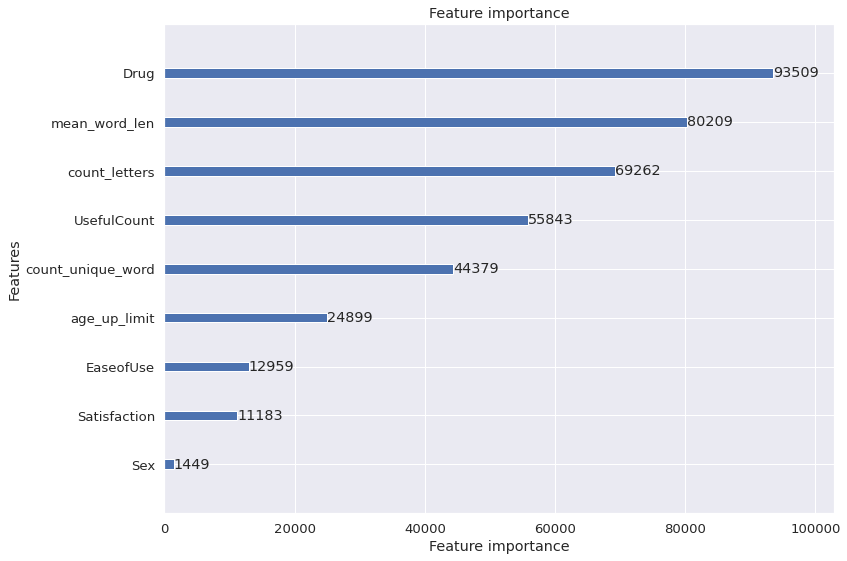

In [111]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model)

**7. Naive Bayes**

**A. Bernoulli Naive Bayes**

In [112]:
# Fitting the training data and making the predictions on test data
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [113]:
# Performance Evaluation:
print("Accuracy is", accuracy_score(y_test,y_pred))
print("precision is", precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall is", recall_score(y_test,y_pred,  pos_label='positive', average='micro'))
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))
confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



Accuracy is 0.6750068303064292
precision is 0.6750068303064292
Recall is 0.6750068303064292
f1 score is 0.6750068303064292


array([[    0,     0,   290,     0,     0],
       [    0,     0, 13602,     0,     0],
       [    0,     0, 46942,     0,     0],
       [    0,     0,   223,     0,     0],
       [    0,     0,  8486,     0,     0]])

Observation: Ensemble machine learning models like Random Forest, Gradient Boosting, Extreme Gradient Boosting classifiers have achieved the maximum accuracy of 76.7%. Performance scores obtained are desirable but reduced to a lower level while trying to fine tune hyperparameters.